In [103]:
# Import Dataframe and Processing Libraries
import pandas as pd
from collections import Counter

# Import Data Visulisation Libraries
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

plt.style.use('ggplot')

# set jupyter's max row display
pd.set_option('display.max_row', 1000)

# set jupyter's max column width to 50
pd.set_option('display.max_columns', 50)

In [105]:
# Read and import csv as dataframe
data = pd.read_csv("C:/Users/James Stuart-Smith/PycharmProjects/nlp-web-scrapping/data/actual/cleanedData.csv")
data.head()

,user,message_id,sentiment,content,date,time,securities,tweet text,tokens,num_of_tokens,tokens_in_transformed_text,num_of_tokens_in_transformed_text
0,babybounce,/babybounce/message/226382374,Bullish,$BA travel going green bullish $CCL $RCL $NCLH...,09/07/2020,12:21:03,"['$BA', '$CCL', '$RCL', '$NCLH', '$SPY']",travel going green bullish,"['travel', 'going', 'green', 'bullish']",4,"['travel', 'go', 'green', 'bullish']",4
1,L1_Trading,/L1_Trading/message/226381562,Bullish,$SPY let’s go mooning today,09/07/2020,12:21:03,['$SPY'],let’s go mooning today,"['let', 'go', 'mooning', 'today']",4,"['let', 'go', 'moon', 'today']",4
2,Economist4401,/Economist4401/message/226381511,Bearish,$SPY $SPX $DJIA $DIA $QQQ Analysts on US stock...,09/07/2020,12:21:03,"['$SPY', '$SPX', '$DJIA', '$DIA', '$QQQ']","Analysts on US stock markets: 1. On Monday, Bl...","['analysts', 'us', 'stock', 'markets', 'monday...",58,"['analyst', 'us', 'stock', 'market', 'monday',...",37
3,OkieOkie,/OkieOkie/message/226381256,Bearish,$SPY more China. China wants some of Australia...,09/07/2020,12:21:03,['$SPY'],more China. China wants some of Australia lol🦘🦘🦘🦘,"['china', 'china', 'wants', 'australia', 'lol']",8,"['china', 'china', 'want', 'australia', 'lol']",5
4,risksavage_inthemarket,/risksavage_inthemarket/message/226381105,Bullish,$GNLN $CGC $SPY $KERN $PM “What Does The Insti...,09/07/2020,12:21:03,"['$GNLN', '$CGC', '$SPY', '$KERN', '$PM']",“What Does The Institutional Ownership Tell Us...,"['institutional', 'ownership', 'tell', 'us', '...",80,"['institutional', 'ownership', 'tell', 'us', '...",45


In [135]:
# Total amount of Tweets
len(data)

16874

In [109]:
# Create two boolean tables for bullish and bearish
bullish_tweet_class =  data['sentiment']=='Bullish'

bearish_tweet_class =  data['sentiment']=='Bearish'
bearish_tweet_class.head()

0    False
1    False
2     True
3     True
4    False
Name: sentiment, dtype: bool

In [111]:
# Create two seperate tables for bullish and bearish data
bullish_data = data[bullish_tweet_class]

bearish_data = data[bearish_tweet_class]
bearish_data.head()

,user,message_id,sentiment,content,date,time,securities,tweet text,tokens,num_of_tokens,tokens_in_transformed_text,num_of_tokens_in_transformed_text
2,Economist4401,/Economist4401/message/226381511,Bearish,$SPY $SPX $DJIA $DIA $QQQ Analysts on US stock...,09/07/2020,12:21:03,"['$SPY', '$SPX', '$DJIA', '$DIA', '$QQQ']","Analysts on US stock markets: 1. On Monday, Bl...","['analysts', 'us', 'stock', 'markets', 'monday...",58,"['analyst', 'us', 'stock', 'market', 'monday',...",37
3,OkieOkie,/OkieOkie/message/226381256,Bearish,$SPY more China. China wants some of Australia...,09/07/2020,12:21:03,['$SPY'],more China. China wants some of Australia lol🦘🦘🦘🦘,"['china', 'china', 'wants', 'australia', 'lol']",8,"['china', 'china', 'want', 'australia', 'lol']",5
7,DannETrader,/DannETrader/message/226380472,Bearish,$SPY yesterday was last day of FED repo’s. It ...,09/07/2020,12:21:03,['$SPY'],yesterday was last day of FED repo’s. It isn’t...,"['yesterday', 'last', 'day', 'fed', 'repo', 'i...",12,"['yesterday', 'last', 'day', 'feed', 'repo', '...",8
12,risksavage_inthemarket,/risksavage_inthemarket/message/226382588,Bearish,$SPY $TSLA $BA $JPM $ZM GRAB A NOTEPAD!!! \r\n...,09/07/2020,12:21:34,"['$SPY', '$TSLA', '$BA', '$JPM', '$ZM']",GRAB A NOTEPAD!!! Investing101 FB@risksavagema...,"['grab', 'notepad', 'investing101', 'fb', 'wat...",8,"['grab', 'notepad', 'investing101', 'fb', 'wat...",8
15,ihavespoken,/ihavespoken/message/226383179,Bearish,$SPY 900 point drop in crude coming,09/07/2020,12:25:38,['$SPY'],900 point drop in crude coming,"['point', 'drop', 'crude', 'ing']",5,"['point', 'drop', 'crude', 'ing']",4


In [136]:
len(bullish_data)

9534

In [137]:
len(bearish_data)

7314

In [113]:
# Count the amount of tweets for bullish and bearish users
bearish_word_count = Counter(bearish_data['user'])
bullish_word_count = Counter(bullish_data['user'])

In [115]:
# Convert lists into dataframes
df_bullish = pd.DataFrame(bullish_word_count.items(), columns=["User", "Bullish Occurences"])

df_bearish = pd.DataFrame(bearish_word_count.items(), columns=["User", "Bearish Occurences"])
df_bearish

,User,Bearish Occurences
0,Economist4401,189
1,OkieOkie,64
2,DannETrader,11
3,risksavage_inthemarket,112
4,ihavespoken,4
...,...,...
1406,BastardBorn,1
1407,Ace000,1
1408,LostTendies,1
1409,Ic707,1


In [117]:
# Join the tables
results = df_bullish.merge(df_bearish, how= 'outer', on= 'User')
results

,User,Bullish Occurences,Bearish Occurences
0,babybounce,3.0,NaN
1,L1_Trading,34.0,8.0
2,risksavage_inthemarket,44.0,112.0
3,HeyYouWhoMe,123.0,NaN
4,KaroleinTriedToTrade,6.0,NaN
...,...,...,...
3221,Revenge_Trader,NaN,1.0
3222,BastardBorn,NaN,1.0
3223,Ace000,NaN,1.0
3224,Ic707,NaN,1.0


In [119]:
# Add total column
total_column = results['Bullish Occurences'].fillna(0) + results['Bearish Occurences'].fillna(0)
results['Total'] = total_column
results

,User,Bullish Occurences,Bearish Occurences,Total
0,babybounce,3.0,NaN,3.0
1,L1_Trading,34.0,8.0,42.0
2,risksavage_inthemarket,44.0,112.0,156.0
3,HeyYouWhoMe,123.0,NaN,123.0
4,KaroleinTriedToTrade,6.0,NaN,6.0
...,...,...,...,...
3221,Revenge_Trader,NaN,1.0,1.0
3222,BastardBorn,NaN,1.0,1.0
3223,Ace000,NaN,1.0,1.0
3224,Ic707,NaN,1.0,1.0


In [121]:
# Creating Percentage Bullish to Bearish Columns
bullish_percentages = (results['Bullish Occurences'].fillna(0) / results['Total'])
bearish_percentages = (results['Bearish Occurences'].fillna(0) / results['Total'])

results.insert(2, "Bullish Percentages", bullish_percentages)
results.insert(4, "Bearish Percentages", bearish_percentages)

#results = results.style.format({'Bullish Occurences': '{:,}',
#    'Bullish Percentages': '{:.2%}',
#    'Bearish Occurences': '{:,}', 
#    'Bearish Percentages': '{:.2%}',
#    'total': '{:,}'})

In [ ]:
# Export Table to Excel (If needed)
results.to_csv(r"C:/Users/James Stuart-Smith/PycharmProjects/nlp-web-scrapping/data/actual/userCount.csv", index = True)

In [124]:
# Sort by total column and find top 10
results = results.sort_values(by='Total', ascending= False)
results1 = results.head(15)
results1

,User,Bullish Occurences,Bullish Percentages,Bearish Occurences,Bearish Percentages,Total
2464,MarsProbe,NaN,0.000000,221.0,1.000000,221.0
183,OhYesNotMe,218.0,1.000000,NaN,0.000000,218.0
662,VikingTraders,188.0,0.969072,6.0,0.030928,194.0
1575,Economist4401,2.0,0.010471,189.0,0.989529,191.0
915,SeriouslyFurious,191.0,1.000000,NaN,0.000000,191.0
2,risksavage_inthemarket,44.0,0.282051,112.0,0.717949,156.0
1469,InvestorShock,22.0,0.153846,121.0,0.846154,143.0
153,soldierofcourage,123.0,1.000000,NaN,0.000000,123.0
3,HeyYouWhoMe,123.0,1.000000,NaN,0.000000,123.0
164,DefStar,117.0,1.000000,NaN,0.000000,117.0


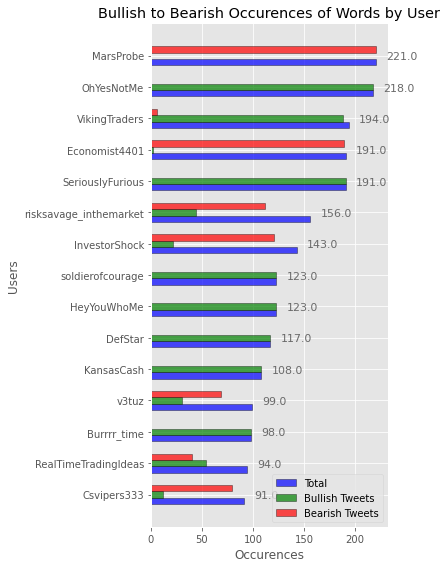

In [125]:
# Create Bar Chart of user and occurences
y_user = results1['User'].tolist()
y_user.reverse()

y_indexes = np.arange(len(y_user))
height = 0.2

x_bull = results1['Bullish Occurences'].tolist()
x_bear = results1['Bearish Occurences'].tolist()
x_total = results1['Total'].tolist()

x_bull.reverse()
x_bear.reverse()
x_total.reverse()

plt.figure(figsize=(6,8))

multi = plt.subplot()
rects1 = multi.barh(y_indexes - height, x_total, height = height, edgecolor='black',  color = 'blue', alpha = 0.7, label = 'Total')
rects2 = multi.barh(y_indexes, x_bull, height = height, edgecolor='black', color = 'green', alpha = 0.7, label = 'Bullish Tweets')
rects3 = multi.barh(y_indexes + height, x_bear, height = height, edgecolor='black' , color = 'red', alpha = 0.7, label = 'Bearish Tweets')

plt.xlabel('Occurences')
plt.ylabel('Users')
plt.yticks(ticks = y_indexes, labels = y_user)
plt.title('Bullish to Bearish Occurences of Words by User')

# set individual bar lables using above list
for i in rects1:
    # get_width pulls left or right; get_y pushes up or down
    plt.text(i.get_width() + 10, i.get_y() + .18, \
            str(round((i.get_width()), 2)), fontsize=11, color='dimgrey')

plt.legend()
plt.tight_layout()
plt.show()

In [126]:
# Restrict total amount of values
results = results.sort_values(by='Total', ascending= False)
results2 = results
results2

,User,Bullish Occurences,Bullish Percentages,Bearish Occurences,Bearish Percentages,Total
2464,MarsProbe,NaN,0.000000,221.0,1.000000,221.0
183,OhYesNotMe,218.0,1.000000,NaN,0.000000,218.0
662,VikingTraders,188.0,0.969072,6.0,0.030928,194.0
1575,Economist4401,2.0,0.010471,189.0,0.989529,191.0
915,SeriouslyFurious,191.0,1.000000,NaN,0.000000,191.0
...,...,...,...,...,...,...
2596,autotech40,NaN,0.000000,1.0,1.000000,1.0
2597,xEd_702,NaN,0.000000,1.0,1.000000,1.0
313,ethenirwin52,1.0,1.000000,NaN,0.000000,1.0
312,briannaturner47,1.0,1.000000,NaN,0.000000,1.0


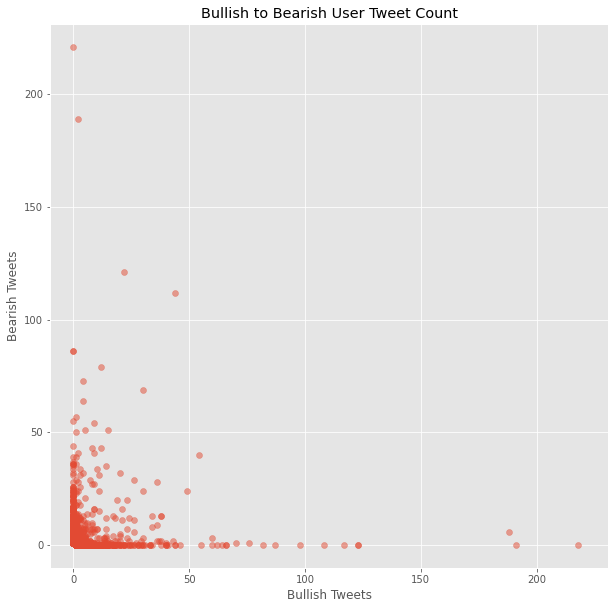

In [127]:
# Plot the Scatter Graph
results = results.fillna(0)
x_bull = results['Bullish Occurences'].tolist()
y_bear = results['Bearish Occurences'].tolist()

plt.figure(figsize=(10,10))

plt.title('Bullish to Bearish User Tweet Count')
plt.xlabel('Bullish Tweets')
plt.ylabel('Bearish Tweets')

plt.scatter(x_bull, y_bear, alpha = 0.5)

# Find maximum plot value of bullish or bearish tweets
if max(x_bull) >= max(y_bear):
    plt.xlim(-10, max(x_bull) + 10)
    plt.ylim(-10, max(x_bull) + 10)
else:
    plt.xlim(-10, max(y_bear) + 10)
    plt.ylim(-10, max(y_bear) + 10)

plt.show()

In [128]:
#filtering tweets for 20 + tweets by User and over 80% lean towards bullish or Bearish
results_filtered = results['Total'] >= 20
results3 = results[results_filtered]

high_bullish = results3['Bullish Percentages'] >= 0.8
results31 = results3[high_bullish]

high_bearish = results3['Bearish Percentages'] >= 0.8
results32 = results3[high_bearish]

results_filtered = pd.concat([results31, results32])
results_filtered.head()

,User,Bullish Occurences,Bullish Percentages,Bearish Occurences,Bearish Percentages,Total
183,OhYesNotMe,218.0,1.000000,0.0,0.000000,218.0
662,VikingTraders,188.0,0.969072,6.0,0.030928,194.0
915,SeriouslyFurious,191.0,1.000000,0.0,0.000000,191.0
153,soldierofcourage,123.0,1.000000,0.0,0.000000,123.0
3,HeyYouWhoMe,123.0,1.000000,0.0,0.000000,123.0


In [142]:
results_filtered = results_filtered.sort_values(by='Total', ascending= False)
results4 = results_filtered.head(15)

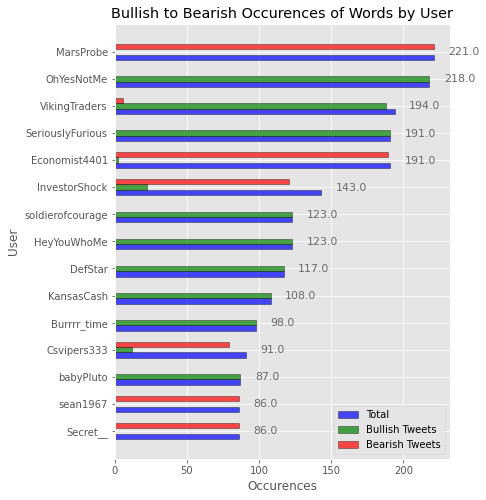

In [143]:
# Create Filtered Bar Chart
y_user = results4['User'].tolist()
y_user.reverse()

y_indexes = np.arange(len(y_user))
height = 0.2

x_bull = results4['Bullish Occurences'].tolist()
x_bear = results4['Bearish Occurences'].tolist()
x_total = results4['Total'].tolist()

x_bull.reverse()
x_bear.reverse()
x_total.reverse()

plt.figure(figsize=(6,8))

multi = plt.subplot()
rects1 = multi.barh(y_indexes - height, x_total, height = height, edgecolor='black',  color = 'blue', alpha = 0.7, label = 'Total')
rects2 = multi.barh(y_indexes, x_bull, height = height, edgecolor='black', color = 'green', alpha = 0.7, label = 'Bullish Tweets')
rects3 = multi.barh(y_indexes + height, x_bear, height = height, edgecolor='black' , color = 'red', alpha = 0.7, label = 'Bearish Tweets')

plt.xlabel('Occurences')
plt.ylabel('User')
plt.yticks(ticks = y_indexes, labels = y_user)
plt.title('Bullish to Bearish Occurences of Words by User')

# set individual bar lables using above list
for i in rects1:
    # get_width pulls left or right; get_y pushes up or down
    plt.text(i.get_width() + 10, i.get_y() + .18, \
            str(round((i.get_width()), 2)), fontsize=11, color='dimgrey')

plt.legend()
plt.show()

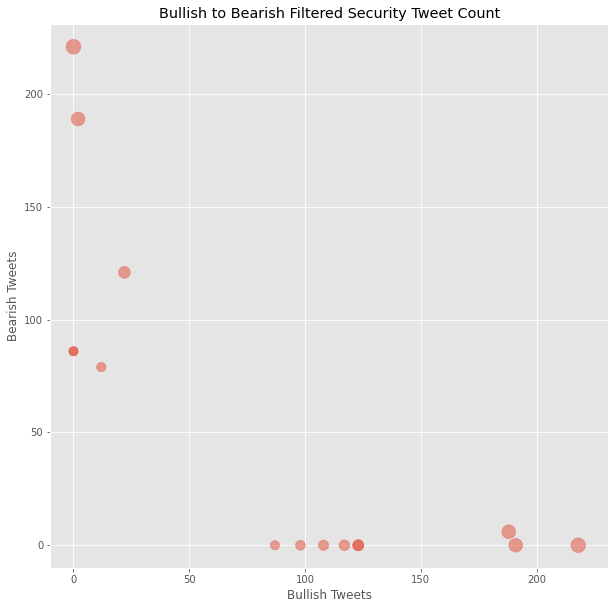

In [144]:
# Plot the Scatter Graph
results4 = results4.fillna(0)
x_bull = results4['Bullish Occurences'].tolist()
y_bear = results4['Bearish Occurences'].tolist()
s_total = results4['Total'].tolist()

plt.figure(figsize=(10,10))

plt.title('Bullish to Bearish Filtered Security Tweet Count')
plt.xlabel('Bullish Tweets')
plt.ylabel('Bearish Tweets')

plt.scatter(x_bull, y_bear, s = s_total, alpha = 0.5)

# Find maximum plot value of bullish or bearish tweets
if max(x_bull) >= max(y_bear):
    plt.xlim(-10, max(x_bull) + 10)
    plt.ylim(-10, max(x_bull) + 10)
else:
    plt.xlim(-10, max(y_bear) + 10)
    plt.ylim(-10, max(y_bear) + 10)

plt.show()

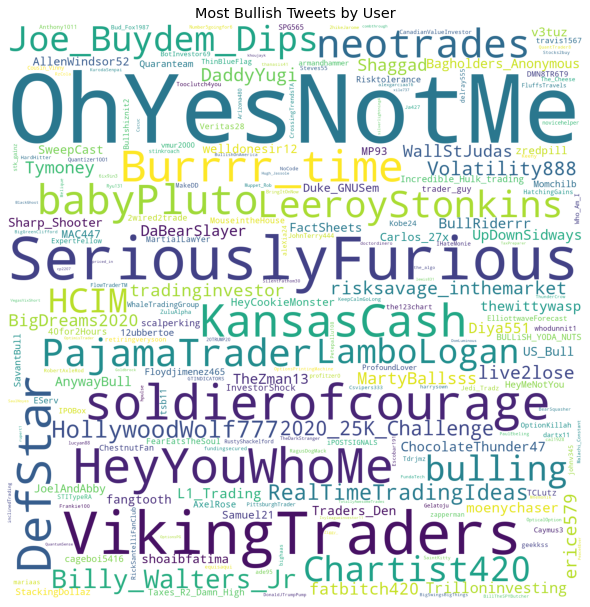

In [132]:
# Bullish User Word Cloud
word_freq = results.set_index('User')['Bullish Occurences'].to_dict()

wordcloud = WordCloud(width = 1500, 
                height = 1500, 
                background_color ='white',
                max_words = 800,
                max_font_size = 300, 
                min_font_size = 10).generate(str(results['User'])) 

wordcloud.generate_from_frequencies(word_freq)
                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title('Most Bullish Tweets by User')
  
plt.show() 

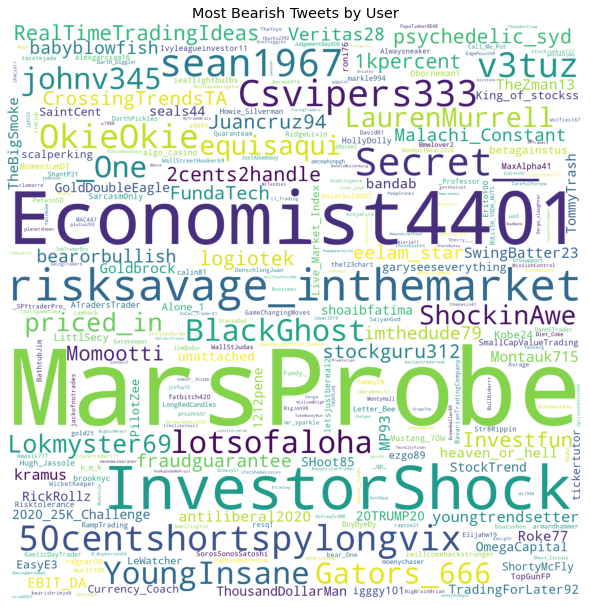

In [134]:
# Bullish User Word Cloud
word_freq = results.set_index('User')['Bearish Occurences'].to_dict()

wordcloud = WordCloud(width = 1500, 
                height = 1500, 
                background_color ='white',
                max_words = 800,
                max_font_size = 300, 
                min_font_size = 10).generate(str(results['User'])) 

wordcloud.generate_from_frequencies(word_freq)
                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title('Most Bearish Tweets by User')
  
plt.show() 